# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

2022-12-11 13:42:02.252322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 13:42:02.340956: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-11 13:42:02.783597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-11 13:42:02.783639: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

2022-12-11 13:42:05.840465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 13:42:05.851704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 13:42:05.851839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# 1.0 Import the Dataset

In [4]:
model_name = 'KMNIST'
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

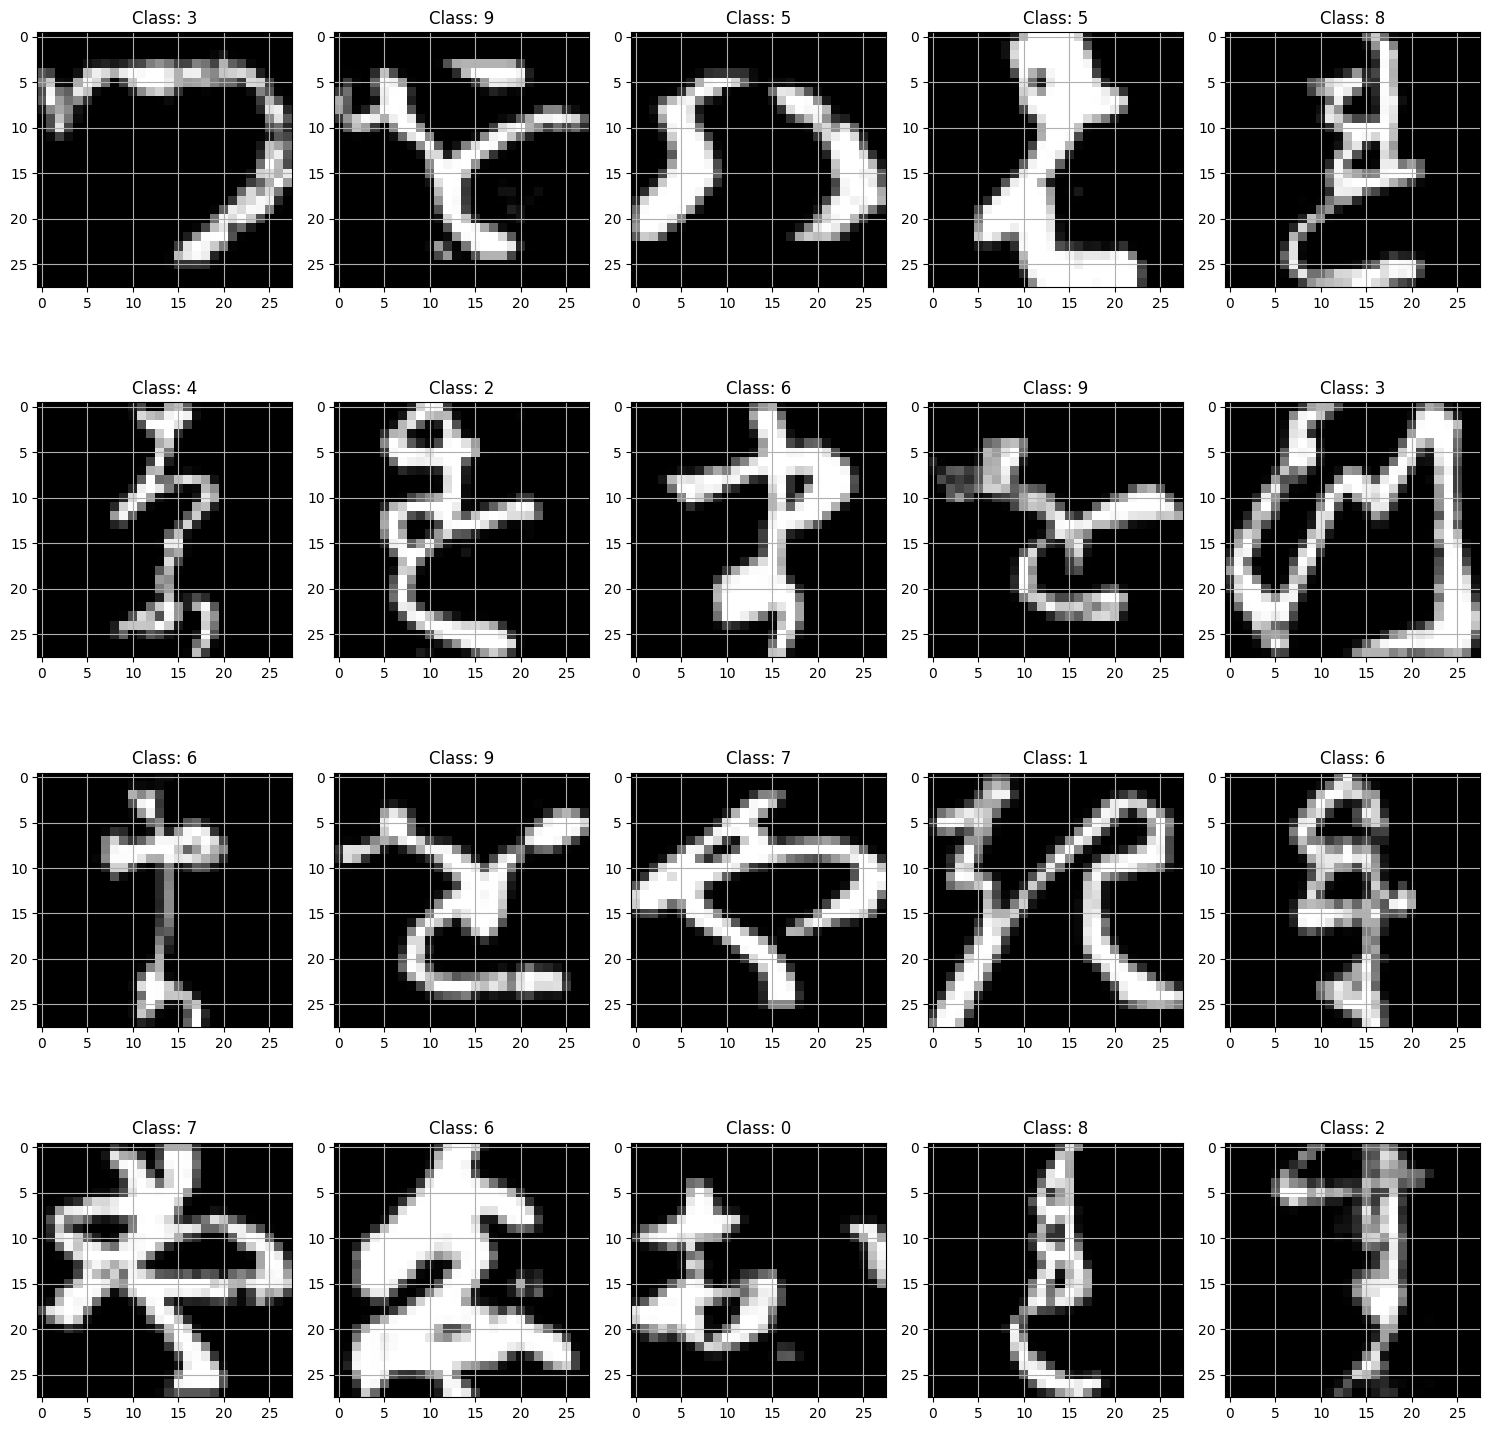

In [5]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_train[:n_images,...,0], dataset.y_train[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [17]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_22 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_23 (Bat  (None, 22, 22, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 20, 20, 64)  

# 3.0 Train the Model

In [18]:
# model_train.config['epochs'] = 150
# model_train.config['lr_dec'] = 0.97
# model_train.config['lr'] = 2e-4
# model_train.config['min_lr'] = 3e-5
history = model_train.train(dataset, initial_epoch=0)

------------------------------KMNIST train------------------------------
Layer PrimaryCaps has arguments ['F', 'K', 'N', 'D', 's']
in `__init__` and therefore must override `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2):
        super().__init__()
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config


2022-12-11 14:49:27.875675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 14:49:27.875846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 14:49:27.875931: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 14:49:27.876043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 14:49:27.876128: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Epoch 1/150
3145/3150 [============================>.] - ETA: 0s - loss: 0.8917 - Efficient_CapsNet_loss: 0.8602 - Generator_loss: 0.0804 - Efficient_CapsNet_accuracy: 0.8480
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.95323, saving model to bin/efficient_capsnetKMNIST_new_train.h5
3150/3150 [==============================] - 19s 6ms/step - loss: 0.8909 - Efficient_CapsNet_loss: 0.8594 - Generator_loss: 0.0804 - Efficient_CapsNet_accuracy: 0.8481 - val_loss: 0.3076 - val_Efficient_CapsNet_loss: 0.2734 - val_Generator_loss: 0.0872 - val_Efficient_CapsNet_accuracy: 0.9532 - lr: 5.0000e-04
Epoch 2/150
3149/3150 [============================>.] - ETA: 0s - loss: 0.3279 - Efficient_CapsNet_loss: 0.2978 - Generator_loss: 0.0767 - Efficient_CapsNet_accuracy: 0.9425
Epoch 2: val_Efficient_CapsNet_accuracy improved from 0.95323 to 0.97333, saving model to bin/efficient_capsnetKMNIST_new_train.h5
3150/3150 [==============================] - 18s 6ms/step - loss: 0.3279 - Effic

In [ ]:
plotHistory(history)

# 4.0 Test the Model

In [19]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path='bin/efficient_capsnetKMNIST_new_train.h5')
model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_26 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_27 (Bat  (None, 22, 22, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 20, 20, 64)  

In [20]:
model_test.evaluate(dataset.X_test, dataset.y_test)

------------------------------KMNIST Evaluation------------------------------
313/313 [==============================] - 1s 2ms/step
Test acc: 0.9744
Test error [%]: 2.5600%
N° misclassified images: 255 out of 10000
